In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

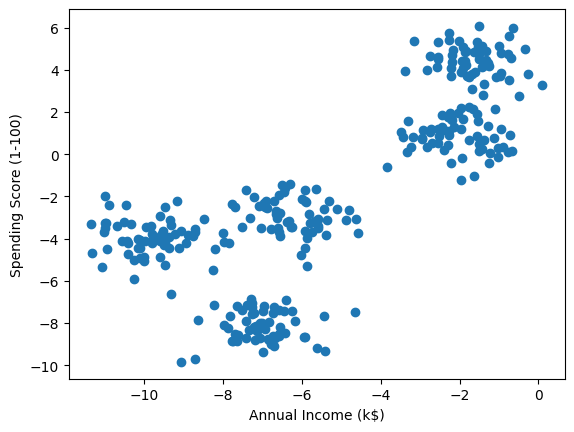

In [28]:
from sklearn.datasets import make_blobs
# Create synthetic data
np.random.seed(1)
x, _ = make_blobs(n_samples=300, centers=5, cluster_std=.8)
 
# Visualize the data 
plt.scatter(x[:,0], x[:,1])
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.show()

{'bandwidth': 2, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}


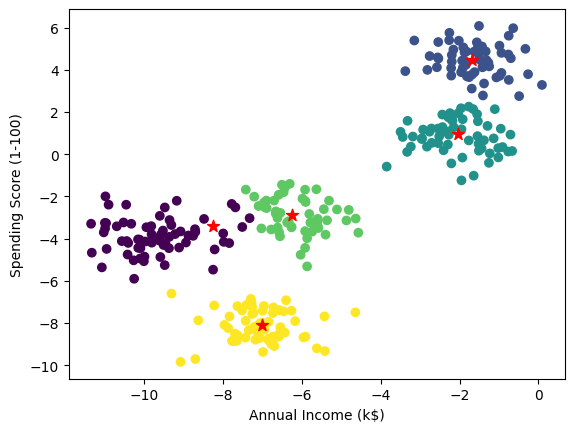

In [43]:
# Create Mean Shift instance and fit it to the data
mshclust=MeanShift(bandwidth=2).fit(x)
print(mshclust.get_params()) 
  
# Visualize original data 
plt.scatter(x[:,0], x[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], marker='*', color="r",s=80 )
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.show()

In [44]:

# get cluster centers
centers = mshclust.cluster_centers_ 

In [45]:
centers

array([[-8.24349135, -3.41503224],
       [-1.67630289,  4.49419217],
       [-2.03109411,  0.93857513],
       [-6.24063251, -2.86941827],
       [-6.99816642, -8.11533828]])

In [40]:
# Count the number of clusters
n_clusters = len(set(mshclust.labels_))

In [41]:
n_clusters

5

In [47]:
labels = mshclust.fit_predict(x)

supervised = pd.DataFrame(dataset)


In [48]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [50]:
# Assuming supervised DataFrame has fewer samples than the clustering data
# Trim the clustering data to match the length of the DataFrame index
labels_trimmed = labels[:len(supervised)]

# Add cluster labels to DataFrame
supervised['cluster_group'] = labels_trimmed


In [51]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


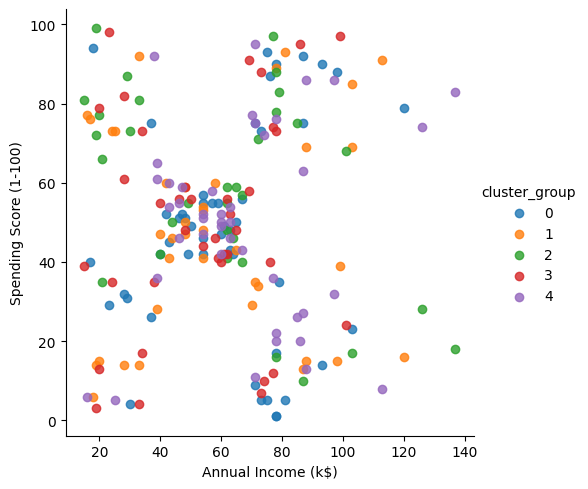

In [52]:
import seaborn as sns

sns.lmplot(
    data=supervised,
    x=supervised.columns[3],
    y=supervised.columns[4],
    hue=supervised.columns[5],
    fit_reg=False,
    facet_kws={'legend_out': True}  # Pass legend_out using facet_kws
)